<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [34]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2: Visualizations

## For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner occupied homes')

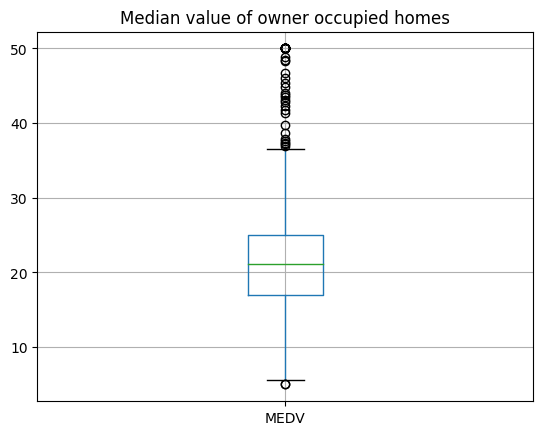

In [24]:
boston_df.boxplot(column='MEDV')
pyplot.title('Median value of owner occupied homes')

__Explanation:__ We see that the median value is a little more than 20, but there are many outliers above the 75 quantile, meaning the population is right skewed.

## Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Properties that bound Charles River')

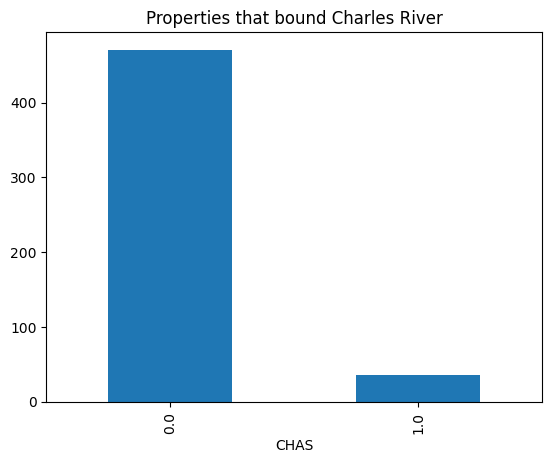

In [30]:
boston_df['CHAS'].value_counts().plot(kind='bar')
pyplot.title('Properties that bound Charles River')

__Explanation:__ The majority of the houses does not bound the river, as we would expect.

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<AxesSubplot:title={'center':'MEDV'}, xlabel='age_group'>

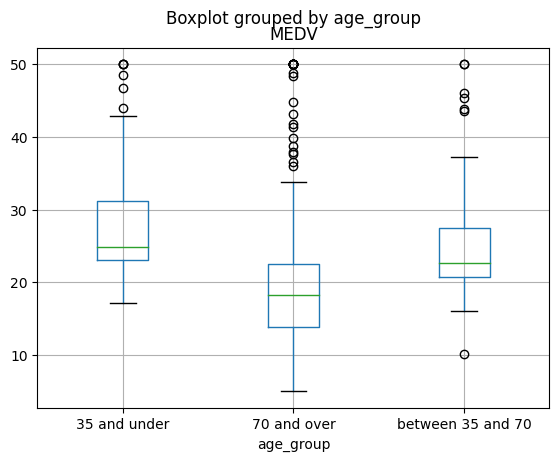

In [36]:
boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] = '35 and under'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[boston_df['AGE'] >= 70, 'age_group'] = '70 and over'

boston_df.boxplot(column='MEDV', by='age_group')


__Explanation:__ The towns with the highest population of old houses (70\% and over) have the lowest median house value, and the towns with the lowest population of old houses have the highest median house value. But we can see that all three groups have outliers with a higher value, so the maximum house price is similar for all three groups.

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric Oxide concentration vs. non-retail business acres')

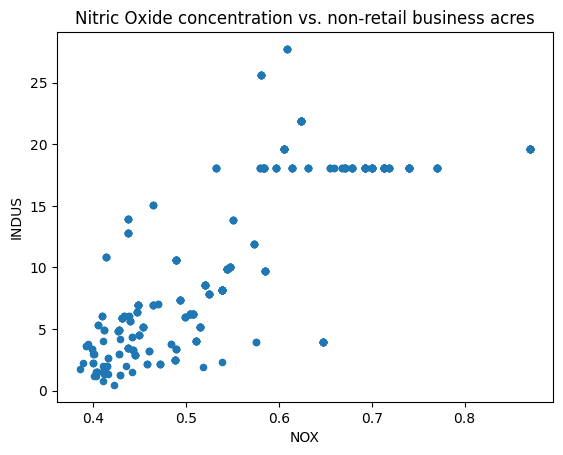

In [43]:
boston_df.plot.scatter(x='NOX', y='INDUS')
pyplot.title('Nitric Oxide concentration vs. non-retail business acres' )

__Explanation:__ There seems to be a correlation between the NOX and INDUS variable, where when NOX increases, INDUS also increases (this will be confirmed later using the Pearson test).

# Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

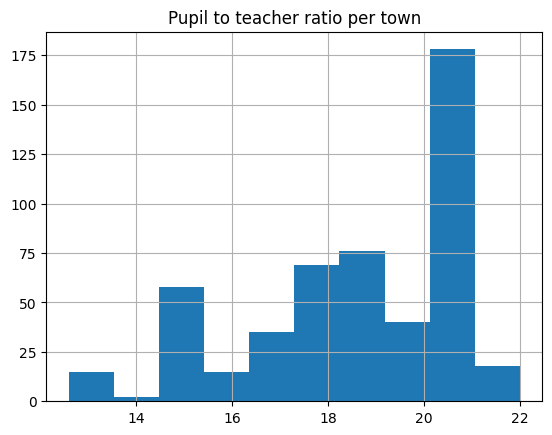

In [48]:
boston_df['PTRATIO'].hist()
pyplot.title('Pupil to teacher ratio per town')

__Explanation:__ There are many towns with a pupil to teacher ratio of 21 (mode), the lowest pupil to teacher ratio is 13 and the highest is 22.

## Task 3: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   Null hypothesis: $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river and those that are not")
*   Alternative hypothesis: $H_1: \mu_1 \neq \mu_2$ ("the median value of the houses bouded by the river and not differ")

Starting with the Levene test to check for equality of variance:

In [51]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

The p-value is smaller than 0.05, thus we cannot assume equal variances.

In [54]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

__Conclusion:__ The p-value is very small (smaller than our $\alpha=0.05$) so we reject the null hypothesis and conclude that there is statistical evidence that the medan value of these two groups is not the same.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   Null hypothesis: $H_0: \mu_1 = \mu_2 = \mu_3$ ("there is no difference in median value of houses for each proportion of owner-occupied units built prior to 1940")
*   Alternative hypothesis: $H_1:$ At least one of the means differ


In [61]:
boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] = '35 and under'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[boston_df['AGE'] >= 70, 'age_group'] = '70 and over'

Starting with the Levene test to check for equality of variance:

In [63]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 and under']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 and over']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

The p-value is greater than 0.05, thus we can assume equal variances.

In [64]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 and under']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
seventy_more = boston_df[boston_df['age_group'] == '70 and over']['MEDV']

In [65]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_more)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than our $\alpha=0.05$, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [57]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between nitric oxide concentration and 
proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis

*   Null hypothesis: $\beta_1=0$ (distance has no effect on median value)
*   Alternative hypothesis: $\beta_1 \neq 0$ (distance has an effect on median value)

In [59]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        17:41:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so there is evidence of a correlation between the weighted distances to five Boston employment centres and the median home value. Increasing the distance (DIS) by 1 unit, will increase the median home value (MEDV) by 1.0916	on average.